In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import util.normalization as norm
import util.model as models
import util.utility as util

In [3]:
df = pd.read_csv('./sample-clothes.csv', encoding='latin1')
df = df.reset_index(names='reviewer_id')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviewer_id   100 non-null    int64  
 1   Title         100 non-null    object 
 2   Review        100 non-null    object 
 3   Cons_rating   100 non-null    float64
 4   Cloth_class   100 non-null    object 
 5   Materials     100 non-null    float64
 6   Construction  100 non-null    float64
 7   Color         100 non-null    float64
 8   Finishing     100 non-null    float64
 9   Durability    100 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 7.9+ KB
None


,reviewer_id,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,0,So flattering and so comfortable!,I am in love with this dress! It has a relaxed...,5.0,Dresses,0.0,1.0,0.0,1.0,0.0
1,1,Cute but It Pills,"Great color and pattern, with the on trend â...",3.0,Sweaters,0.0,0.0,1.0,0.0,1.0
2,2,It fell apart after one wash,One set fell apart after one wash. Threads cam...,1.0,Sleep,0.0,0.0,1.0,0.0,1.0
3,3,"Comfortable, nice color, but LOTS of pilling.","I like the fit, weight, and color of this swea...",3.0,Sweaters,1.0,1.0,1.0,0.0,0.0
4,4,"Cute dress that.even a short, skinny old woman...",Material is sheer. Make sure you aren't embarr...,5.0,Dresses,1.0,0.0,0.0,0.0,0.0


In [4]:
lower_col = []
for col in df.columns:
    lower_col.append(col.lower())
    
df.columns = lower_col
df = df.rename(columns={'cons_rating': 'rating'})

df['rating'] = df['rating'].astype(int)
df['review'] = df['title'] + " " + df['review']


df = df[['reviewer_id', 'review', 'rating']]

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   reviewer_id  100 non-null    int64 
 1   review       100 non-null    object
 2   rating       100 non-null    int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 2.1+ KB
None


,reviewer_id,review,rating
0,0,So flattering and so comfortable! I am in love...,5
1,1,"Cute but It Pills Great color and pattern, wit...",3
2,2,It fell apart after one wash One set fell apar...,1
3,3,"Comfortable, nice color, but LOTS of pilling. ...",3
4,4,"Cute dress that.even a short, skinny old woman...",5


# Normalization

In [5]:
df_sm = df[['reviewer_id', 'review']].copy()

# Remove non-ASCII
df_sm['review_clean'] = df_sm['review'].apply(norm.remove_non_ascii)

# Expand contractions
df_sm['review_clean'] = df_sm['review_clean'].apply(norm.expand_contractions)

# Remove characters
df_sm['review_clean'] = df_sm['review_clean'].apply(norm.remove_characters, args=(True, ))

In [6]:
df_sm.head()

,reviewer_id,review,review_clean
0,0,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in love...
1,1,"Cute but It Pills Great color and pattern, wit...","Cute but It Pills Great color and pattern, wit..."
2,2,It fell apart after one wash One set fell apar...,It fell apart after one wash One set fell apar...
3,3,"Comfortable, nice color, but LOTS of pilling. ...","Comfortable, nice color, but LOTS of pilling. ..."
4,4,"Cute dress that.even a short, skinny old woman...","Cute dress that.even a short, skinny old woman..."


In [7]:
from transformers import pipeline

classifier = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [8]:
def get_summarize(text, min_length=25, max_length=68):
    result = classifier(text, min_length=min_length, max_length=max_length)
    return result[0]['summary_text']

In [9]:
tqdm.pandas()
df_sm['summarize'] = df_sm['review_clean'].progress_apply(get_summarize)
print(df_sm.info())
df_sm.head()

 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [06:25<00:32,  4.58s/it]Your max_length is set to 68, but you input_length is only 10. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [06:56<00:00,  4.17s/it]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviewer_id   100 non-null    int64 
 1   review        100 non-null    object
 2   review_clean  100 non-null    object
 3   summarize     100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB
None


,reviewer_id,review,review_clean,summarize
0,0,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in lov...
1,1,"Cute but It Pills Great color and pattern, wit...","Cute but It Pills Great color and pattern, wit...","Material began to pill after first wearing, a..."
2,2,It fell apart after one wash One set fell apar...,It fell apart after one wash One set fell apar...,One set fell apart after one wash . Threads c...
3,3,"Comfortable, nice color, but LOTS of pilling. ...","Comfortable, nice color, but LOTS of pilling. ...","Comfortable, nice color, but lots of pilling ..."
4,4,"Cute dress that.even a short, skinny old woman...","Cute dress that.even a short, skinny old woman...","Cute dress that.even a short, skinny old woma..."


In [10]:
# Sentence Tokenization
df_st = df_sm.copy()
# df_st['token_sentence'] = df_st['summarize'].apply(norm.sentence_tokenize)
df_st['token_sentence'] = df_st['review_clean'].apply(norm.sentence_tokenize)
df_st = df_st.explode('token_sentence')
df_st['token_sentence'] = df_st['token_sentence'].str.strip()

# Remove characters
df_st['token_sentence'] = df_st['token_sentence'].apply(norm.remove_characters, args=(True, ))

# Lower text
# df_st['token_sentence'] = df_st['token_sentence'].apply(lambda x: x.lower())

# Lemmatization
df_st['token_lemma'] = df_st['token_sentence'].apply(norm.lemmatize_text)

# Get Aspect and Applied Sentiment Analysis (Rules Based)

In [11]:
# Get aspect from rules
tqdm.pandas()
df_st['aspect'] = df_st['token_lemma']\
                        .progress_apply(util.get_aspect_rules)

print(df_st.info())
df_st.head()

100%|████████████████████████████████████████████████████████████████████████████████| 518/518 [00:52<00:00,  9.88it/s]


<class 'pandas.core.frame.DataFrame'>
Index: 518 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewer_id     518 non-null    int64 
 1   review          518 non-null    object
 2   review_clean    518 non-null    object
 3   summarize       518 non-null    object
 4   token_sentence  518 non-null    object
 5   token_lemma     518 non-null    object
 6   aspect          518 non-null    object
dtypes: int64(1), object(6)
memory usage: 32.4+ KB
None


,reviewer_id,review,review_clean,summarize,token_sentence,token_lemma,aspect
0,0,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in lov...,So flattering and so comfortable!,so flattering and so comfortable !,{}
0,0,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in lov...,I am in love with this dress!,i be in love with this dress !,{}
0,0,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in lov...,It has a relaxed fit style as described,it have a relaxed fit style as described,{fit style}
0,0,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in lov...,and I received compliments from my sister and ...,and i receive compliment from my sister and a ...,"{compliment, grocery}"
0,0,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in lov...,It has pockets and a zipper on the left side.,it have pocket and a zipper on the left side .,"{left side, pocket}"


In [12]:
df_st

,reviewer_id,review,review_clean,summarize,token_sentence,token_lemma,aspect
0,0,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in lov...,So flattering and so comfortable!,so flattering and so comfortable !,{}
0,0,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in lov...,I am in love with this dress!,i be in love with this dress !,{}
0,0,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in lov...,It has a relaxed fit style as described,it have a relaxed fit style as described,{fit style}
0,0,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in lov...,and I received compliments from my sister and ...,and i receive compliment from my sister and a ...,"{compliment, grocery}"
0,0,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in lov...,It has pockets and a zipper on the left side.,it have pocket and a zipper on the left side .,"{left side, pocket}"
...,...,...,...,...,...,...,...
99,99,"Cute, with reservations First one i received w...","Cute, with reservations First one i received w...","Cute, with reservations . First one ripped ap...",on the positive side,on the positive side,{positive side}
99,99,"Cute, with reservations First one i received w...","Cute, with reservations First one i received w...","Cute, with reservations . First one ripped ap...",it is very cute and i am keeping the replaceme...,it be very cute and i be keep the replacement one,{replacement}
99,99,"Cute, with reservations First one i received w...","Cute, with reservations First one i received w...","Cute, with reservations . First one ripped ap...",but know that it is also delicate.,but know that it be also delicate .,{}
99,99,"Cute, with reservations First one i received w...","Cute, with reservations First one i received w...","Cute, with reservations . First one ripped ap...",after one use,after one use,{}


In [13]:
mask = df_st['aspect'].apply(lambda x: False if len(x) == 0 else True).values

temp = df_st[mask].groupby(['reviewer_id'])\
                .agg({'token_sentence': lambda x: '.\n'.join(x),
                      'token_lemma': lambda x: '.\n'.join(x)})\
                .reset_index()

df_prc = df_st.groupby(['reviewer_id'])\
                .agg({'aspect': lambda x: set().union(*x),})\
                .reset_index()

df_prc = df_prc.merge(temp, on='reviewer_id', how='left').fillna("")

df_prc = df_sm.merge(df_prc, on='reviewer_id', how='left')
print(df_prc.info())
df_prc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewer_id     100 non-null    int64 
 1   review          100 non-null    object
 2   review_clean    100 non-null    object
 3   summarize       100 non-null    object
 4   aspect          100 non-null    object
 5   token_sentence  100 non-null    object
 6   token_lemma     100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
None


,reviewer_id,review,review_clean,summarize,aspect,token_sentence,token_lemma
0,0,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in love...,So flattering and so comfortable! I am in lov...,"{beige sandal, casual look, compliment, left s...",It has a relaxed fit style as described.\nand ...,it have a relaxed fit style as described.\nand...
1,1,"Cute but It Pills Great color and pattern, wit...","Cute but It Pills Great color and pattern, wit...","Material began to pill after first wearing, a...","{great color, material, slouchy look, wash cyc...",Cute but It Pills Great color and pattern.\nwi...,cute but it pill great color and pattern.\nwit...
2,2,It fell apart after one wash One set fell apar...,It fell apart after one wash One set fell apar...,One set fell apart after one wash . Threads c...,"{bad thing, string, set, thread, product info,...",It fell apart after one wash One set fell apar...,it fell apart after one wash one set fell apar...
3,3,"Comfortable, nice color, but LOTS of pilling. ...","Comfortable, nice color, but LOTS of pilling. ...","Comfortable, nice color, but lots of pilling ...","{purchase, good care, nice color, fit, fabric,...",nice color.\nI like the fit.\nweight.\nI would...,nice color.\ni like the fit.\nweight.\ni would...
4,4,"Cute dress that.even a short, skinny old woman...","Cute dress that.even a short, skinny old woman...","Cute dress that.even a short, skinny old woma...","{necessary spot, material, old woman, woman sk...",Cute dress that.even a short.\nskinny old woma...,cute dress that.even a short.\nskinny old woma...


In [14]:
df_prc['token_sentence'].iloc[0]

"It has a relaxed fit style as described.\nand I received compliments from my sister and a stranger when I was doing groceries haha..\nIt has pockets and a zipper on the left side..\nThe fabric is breathable and comfortable..\nIt fits perfectly and has the perfect length..\nI paired it with beige sandals and a beige crossbody bag for a casual look..\nFor reference I am 5'1 and got a size extra small..\nYou can also click my name to see my profile for more items I love!"

In [15]:
df_prc['summarize'].iloc[0]

' So flattering and so comfortable! I am in love with this dress! It has a relaxed fit style as described . It has pockets and a zipper on the left side . The fabric is breathable and comfortable .'

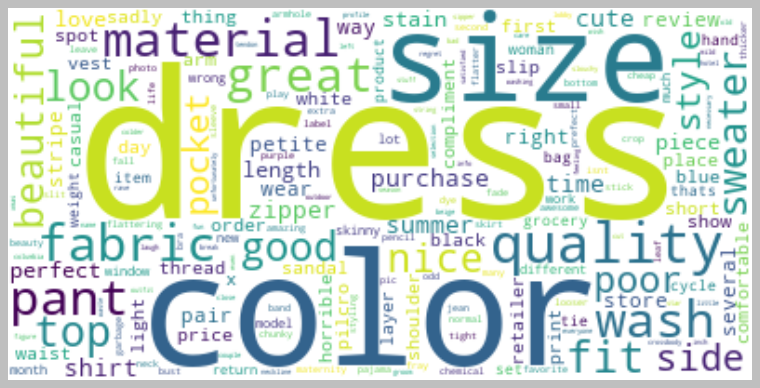

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ""
sub_aspect = df_prc['aspect'].values
for i in range(df_prc.shape[0]):
    text = text + " " + " ".join(list(sub_aspect[i]))
    

text = text.strip()

wordcloud = WordCloud(background_color='white').generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Get Topic

In [17]:
# def get_optimum_lda(dictionary, corpus, texts, limit,
#                     start=2, step=1, get_result=False,
#                     iterations=20, passes=1):
#     coherence_values = []
    
#     for n in range(start, limit, step):
#         lda = gensim.models.LdaMulticore(corpus=corpus,
#                                          num_topics=n,
#                                          id2word=dictionary,
#                                          iterations=iterations,
#                                          passes=passes)
        
#         # Create coherence
#         coherence_model = CoherenceModel(model=lda, 
#                                          texts=texts,
#                                          dictionary=dictionary, 
#                                          coherence='c_v')
#         coherence_values.append(coherence_model.get_coherence())
    
    
#     opt_num_topics = start + coherence_values.index(max(coherence_values))
    
#     lda_opt = gensim.models.LdaMulticore(corpus=corpus,
#                                          num_topics=opt_num_topics,
#                                          id2word=dictionary)
    
#     if get_result:
#         print(coherence_values)
    
#     return lda_opt



In [18]:
# import gensim
# from gensim.models import CoherenceModel


# texts = df_prc['summarize'].apply(util.preprocess_lda)
# # texts = df_prc['sub_aspect'].apply(lambda x: ', '.join(list(x))).apply(util.preprocess_lda)

# dictionary = gensim.corpora.Dictionary(texts)

# dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100_000)
# bow_corpus = [dictionary.doc2bow(doc) for doc in texts]

# lda_opt = get_optimum_lda(dictionary, bow_corpus,
#                           texts, 10, get_result=True,
#                           passes=75, iterations=150)

In [19]:
# # Print topic
# for idx, topic in lda_opt.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))

In [20]:
# def predict_topic(text):
#     text = util.preprocess_lda(text)
#     bow_vector = dictionary.doc2bow(text)
    
#     result = sorted(lda_opt[bow_vector], 
#                     key=lambda x: -1*x[1])[0][0]
    
#     return result
    
# # Extract keywords into a dictionary or list
# threshold = 0.05
# topics_dict = {}
# for topic_num, topic in lda_opt.show_topics(num_topics=10,
#                                                 num_words=10,
#                                                 formatted=False):
#     keywords = [word for word, w in topic if w > threshold]
#     topics_dict[topic_num] = keywords

In [21]:
# topics_dict

In [22]:
# tqdm.pandas()
# df_prc['topic'] = df_prc['summarize'].progress_apply(predict_topic)

In [23]:
# tqdm.pandas()
# df_prc['topic_keys'] = df_prc['topic'].progress_apply(lambda x: topics_dict[x])

In [24]:
# df_prc

# Save Result

In [26]:
# result = df_prc[['reviewer_id', 'review', 'summarize', 'aspect', 'topic_sentence', 'rating']].copy()
result = df_prc.drop('review_clean', axis=1).copy()
result = result.merge(df[['reviewer_id','rating']],
                      on='reviewer_id',
                      how='left')

result['aspect'] = result['aspect'].apply(lambda x: ', '.join(list(x)))
# result['sub_aspect'] = result['sub_aspect'].apply(lambda x: list(x))
# result['topic_keys'] = result['topic_keys'].apply(lambda x: ', '.join(x))

result.to_csv("./clothes_result/base_clothes.csv", index=False)